In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import anndata as ad
import scipy as sp
from numpy.random import default_rng

In [2]:
adata = sq.read.visium(f'../../data/reference_data/06_10x_Visium_Mouse_Olfactory_Bulb')

In [3]:
adata

AnnData object with n_obs × n_vars = 1185 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [5]:
adata.layers['counts'] = adata.X.copy()

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

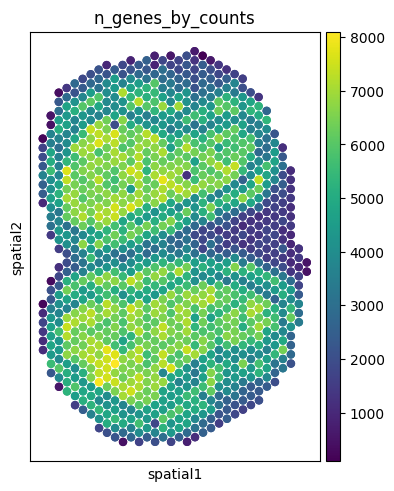

In [7]:
sq.pl.spatial_scatter(adata, color=['n_genes_by_counts'], shape=None)

In [8]:
sc.pp.filter_genes(adata, min_cells=500)

In [9]:
adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells
Mrpl15,ENSMUSG00000033845,Gene Expression,mm10,608,0.884388,0.633603,48.691983,1048.0,6.955593,608
Lypla1,ENSMUSG00000025903,Gene Expression,mm10,514,0.677637,0.517386,56.624473,803.0,6.689599,514
Tcea1,ENSMUSG00000033813,Gene Expression,mm10,704,1.085232,0.734880,40.590717,1286.0,7.160069,704
Atp6v1h,ENSMUSG00000033793,Gene Expression,mm10,676,1.102110,0.742941,42.953586,1306.0,7.175490,676
Rb1cc1,ENSMUSG00000025907,Gene Expression,mm10,564,0.798312,0.586849,52.405063,946.0,6.853299,564
...,...,...,...,...,...,...,...,...,...,...
mt-Nd4l,ENSMUSG00000065947,Gene Expression,mm10,1085,3.584810,1.522749,8.438819,4248.0,8.354439,1085
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10,1185,180.178909,5.199485,0.000000,213512.0,12.271453,1185
mt-Nd5,ENSMUSG00000064367,Gene Expression,mm10,1181,20.118988,3.050173,0.337553,23841.0,10.079204,1181
mt-Cytb,ENSMUSG00000064370,Gene Expression,mm10,1185,223.370468,5.413299,0.000000,264694.0,12.486334,1185


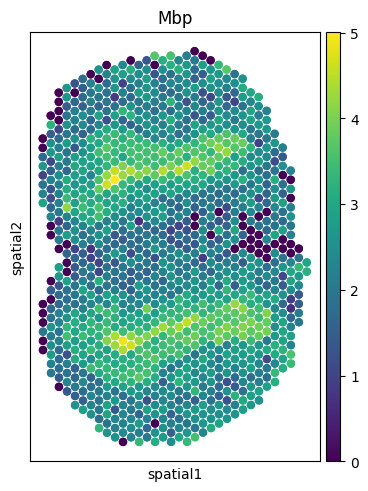

In [10]:
sq.pl.spatial_scatter(adata, color=['Mbp'], shape=None)

In [11]:
rng = default_rng(0)
idx_shuffle = rng.permutation(adata.layers['counts'].shape[0])
adata.layers['counts'] = adata.layers['counts'][idx_shuffle, :]
adata.X = adata.X[idx_shuffle, :]

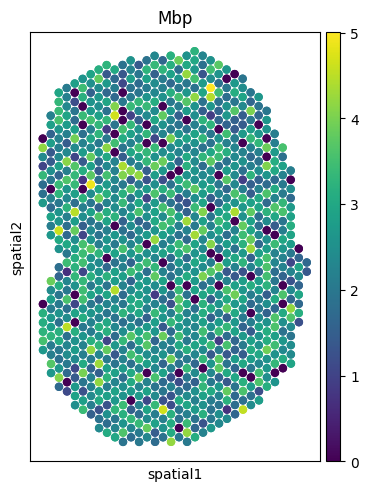

In [12]:
sq.pl.spatial_scatter(adata, color=['Mbp'], shape=None)

In [14]:
adata.write_h5ad('../../results/04_statistical_calibration/06_10x_Visium_Mouse_Olfactory_Bulb.h5ad')